# Customer lifetime value analysis

**Customer lifetime value analysis is a crucial method used to calculate the total worth of customers to a business throughout their entire relationship with the company. It provides valuable insights for determining optimal investments in customer acquisition and retention strategies. Additionally, it aids in identifying the most valuable customers, allowing businesses to prioritize and focus their efforts on retaining these high-value customers. This strategic analysis ultimately contributes to sustainable growth and improved customer relationships.**

In [166]:
import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt

data = pd.read_csv(r"/content/sample_data/customer_acquisition_data.csv")
data.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


**Let’s start the analysis by visualizing the distribution of acquisition cost and revenue generated by the customer using histograms:**

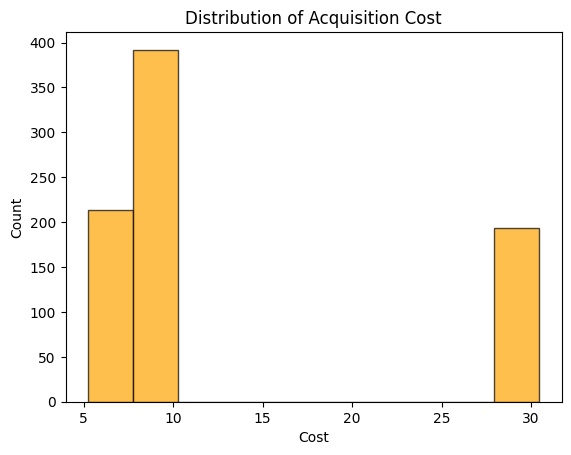

In [167]:
plt.hist(data['cost'], bins=10, edgecolor='black', alpha=0.7, color='orange')  # Set the color to blue
plt.title("Distribution of Acquisition Cost")
plt.xlabel("Cost")
plt.ylabel("Count")
plt.show()

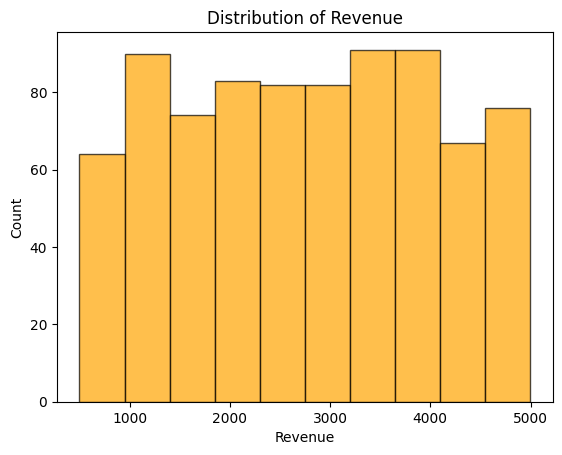

In [168]:
plt.hist(data['revenue'], bins=10, edgecolor='black', alpha=0.7, color='orange')
plt.title("Distribution of Revenue")
plt.xlabel("Revenue")
plt.ylabel("Count")
plt.show()

**Now let’s compare the cost of acquisition across different channels and identify the most and least profitable channels:**

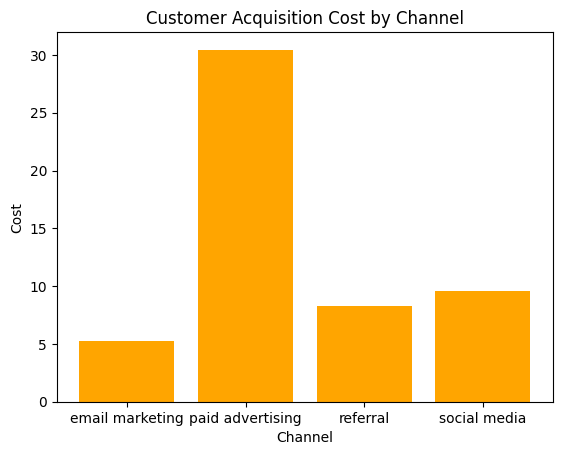

In [169]:
cost_by_channel = data.groupby('channel')['cost'].mean().reset_index()

plt.bar(cost_by_channel['channel'], cost_by_channel['cost'], color='orange')
plt.title("Customer Acquisition Cost by Channel")
plt.xlabel("Channel")
plt.ylabel("Cost")
plt.show()

***So paid advertisement is the most expensive channel, and email marketing is the least expensive channel.***

**Now let’s see which channels are most and least effective at converting customers:**



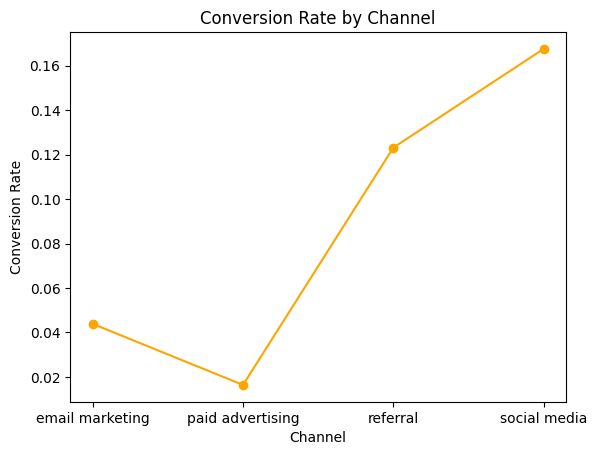

In [170]:
conversion_by_channel = data.groupby('channel')['conversion_rate'].mean().reset_index()

plt.plot(conversion_by_channel['channel'], conversion_by_channel['conversion_rate'], marker='o', color='orange')
plt.title("Conversion Rate by Channel")
plt.xlabel("Channel")
plt.ylabel("Conversion Rate")
plt.show()

***Social media is the most effective channel for converting customers, while paid advertising is the least effective.***

Now let’s calculate the total revenue by channel and have a look at the most and least profitable channels in terms of generating revenue:

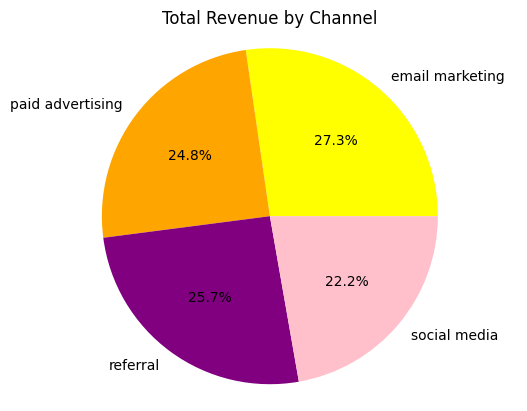

In [176]:
revenue_by_channel = data.groupby('channel')['revenue'].sum().reset_index()

colors = ['yellow','orange', 'purple', 'pink',]

plt.pie(revenue_by_channel['revenue'], labels=revenue_by_channel['channel'], autopct='%1.1f%%', colors=colors)
plt.title("Total Revenue by Channel")
plt.axis('equal')
plt.show()

***So email marketing is the most profitable channel in terms of generating revenue. But there’s not a huge difference between the percentages of revenue generation from all the channels to call any channel the least profitable channel.***

**Now let’s calculate the return on investment (ROI) for each channel:**

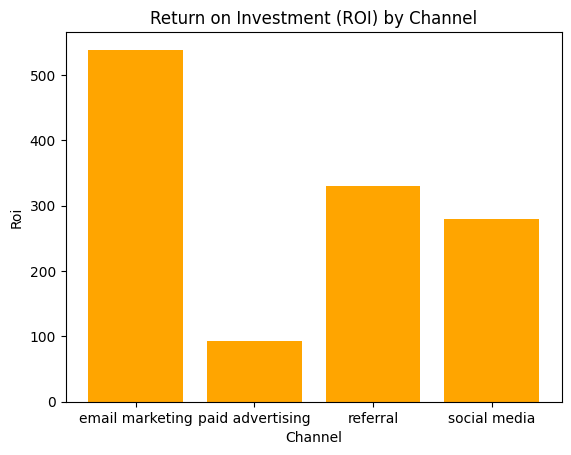

In [172]:
data['roi'] = data['revenue'] / data['cost']

roi_by_channel = data.groupby('channel')['roi'].mean().reset_index()

plt.bar(roi_by_channel['channel'], roi_by_channel['roi'], color='orange')
plt.title("Return on Investment (ROI) by Channel")
plt.xlabel("Channel")
plt.ylabel("Roi")
plt.show()

***The ROI from email marketing is way higher than all other channels, while the ROI from paid advertising is the lowest. Now let’s calculate the customer lifetime value from each channel.***


**Based on the data we have, we can use the formula mentioned below to calculate Customer Life Time Value (CLTV)**

CLTV = (revenue – cost) * conversion_rate / cost



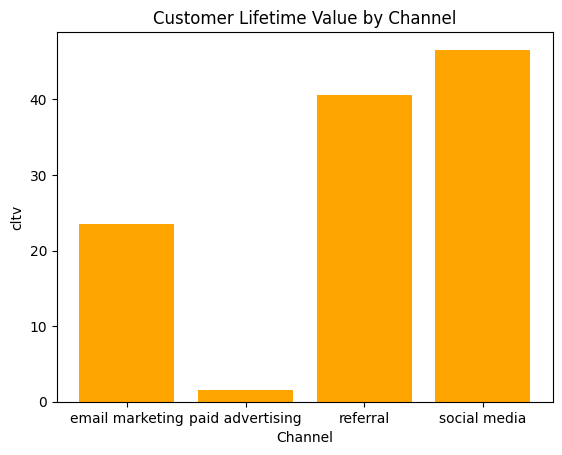

In [173]:
#Update the Dataframe with CLTV colunmn
data['cltv'] = (data['revenue'] - data['cost']) * data['conversion_rate'] / data['cost']

channel_cltv = data.groupby('channel')['cltv'].mean().reset_index()

plt.bar(channel_cltv['channel'], channel_cltv['cltv'], color='orange')
plt.title("Customer Lifetime Value by Channel")
plt.xlabel("Channel")
plt.ylabel("cltv")
plt.show()


***So the customer lifetime value from Social Media and the referral channels is the highest.***

**Now let’s compare the CLTV distributions of the social media and referral channels:**

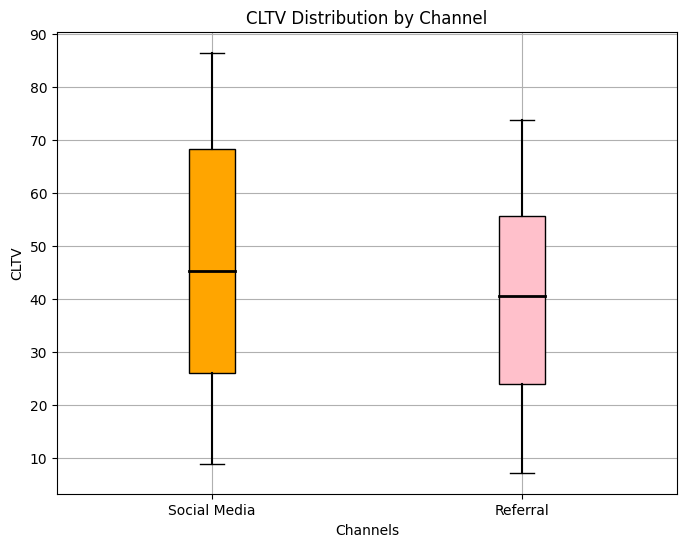

In [179]:
subset = data.loc[data['channel'].isin(['social media', 'referral'])]

plt.figure(figsize=(8, 6))

boxplot_colors = ['orange', 'pink']

bp = plt.boxplot([
    subset.loc[subset['channel'] == 'social media']['cltv'],
    subset.loc[subset['channel'] == 'referral']['cltv']
], labels=['Social Media', 'Referral'], patch_artist=True)

for box, color in zip(bp['boxes'], boxplot_colors):
    box.set(facecolor=color)

for whisker in bp['whiskers']:
    whisker.set(color='black', linewidth=1.5)

for median in bp['medians']:
    median.set(color='black', linewidth=2)

plt.title('CLTV Distribution by Channel')
plt.ylabel('CLTV')
plt.xlabel('Channels')
plt.grid(True)
plt.show()

***There’s not much difference, but the Customer Lifetime Value from the Social Media channel is slightly better than the referral channel.***